# Project Summary
## Anna Boone

In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from ipywidgets import *
import seaborn as sns

## Contents:
1. [Introduction](#Introduction)
2. [Motivation and Background](#Motivation-and-Background)
3. [Methods](#Methods) <br>
    -[Data Collection](#Data-Collection)<br>
    -[Design](#Design)<br>
    -[Analysis](#Analysis)<br>
4. [Significance and Conclusion](#Significance-and-Conclusion)
5. [Further Research](#Further-Research)<br>
5. [Citations](#Citations)<br>


# Introduction

Welcome to my independent research project for Phys 491-Fall/23! For this project I decided to build a species distribution model (SDM) based on the RWSAS (Right Whale Sighting and Advisory System) dataset obtained from NOAA. Using SDM techniques found through online research, I attempt to build a model that will predict the likelihood of the presence of right whales in a location given a specific set of variables. 

# Motivation and Background

The motivation for this project is to better understand how species presence can be modeled using machine learning techniques when the presence data may be severely limited, or very biased. Understanding how to model presence data, that is usually only collected when the collector (often a human) is present in the area, is crucial to understanding the potential environmental needs of a marine mammal species that often has a large migratory pattern over which it would be impossible for humans to be consistently present.

In particular, the North Atlantic Right Whale not only has a large migratory area, but there are so few individuals remaining that it makes research through observation extremely difficult. 

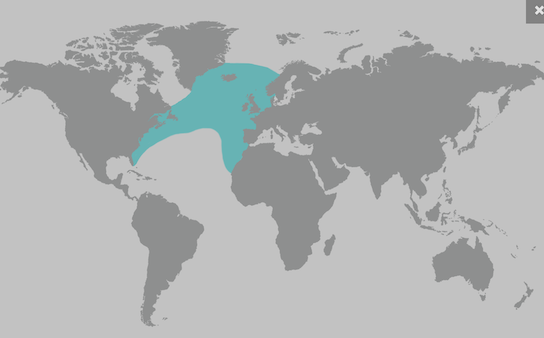

[Photo from the North Atlantic Right Whale Marine Mammal Conservation Commission-Range/Distribution of NARW](https://www.mmc.gov/priority-topics/species-of-concern/north-atlantic-right-whale/)

It is estimated by NOAA that there are fewer than 350 North Atlantic Right whales remaining in the wild, only 70 of which are breeding females (Fisheries, 2022). By understanding the movement of right whales and how environmental and human factors can affect breeding, feeding, and migration, protecting the remaining right whales will become easier. There are already efforts in place to mitigate dangers to the right whale such as marine traffic, and fishing operations. However, predicting possible presence locations could improve the accuracy and effectiveness of these efforts, as well as glean more understanding of the environmental necessities of the right whale species. 


# Methods

## Data Collection

The RWSAS (Right Whale Sighting Advisory System) dataset was obtained through Data.gov and collected by the NOAA fisheries program. This is the observational data for the right whale species, of recorded instances of presence by boats either specifically tasked with observing right whales, or other vessels that reported sightings. The data covers the span of 2002-2018, during all months and has observational data from Newfoundland, to the Gulf of Mexico, and as far east as the Mediterranean. For the purposes of this project, only data from the coast of the United States was used, to provide a more concentrated area for the SDM to predict species presence. 

In order to accurately predict species presence, environmental data was needed to determine the ideal conditions for right whale presence. Understanding the necessary conditions for right whales informed the data that was collected for this purpose, specifically, their feeding needs. Right whales subsist on copepods, or small crustaceans. Factors that affect copepods, will undoubtedly affect right whales, and so environmental data was collected from the COPEPOD project, a division of NOAA fisheries that stands for Coastal & Oceanic Plankton Ecology, Production, & Observation Database. This database has time series data for the same span of years as the RWSAS dataset, collected from numerous satellites and NOAA stations that can be filtered by geographic location. 

For this project, the geographic location was limited to the east coast of the United States. 

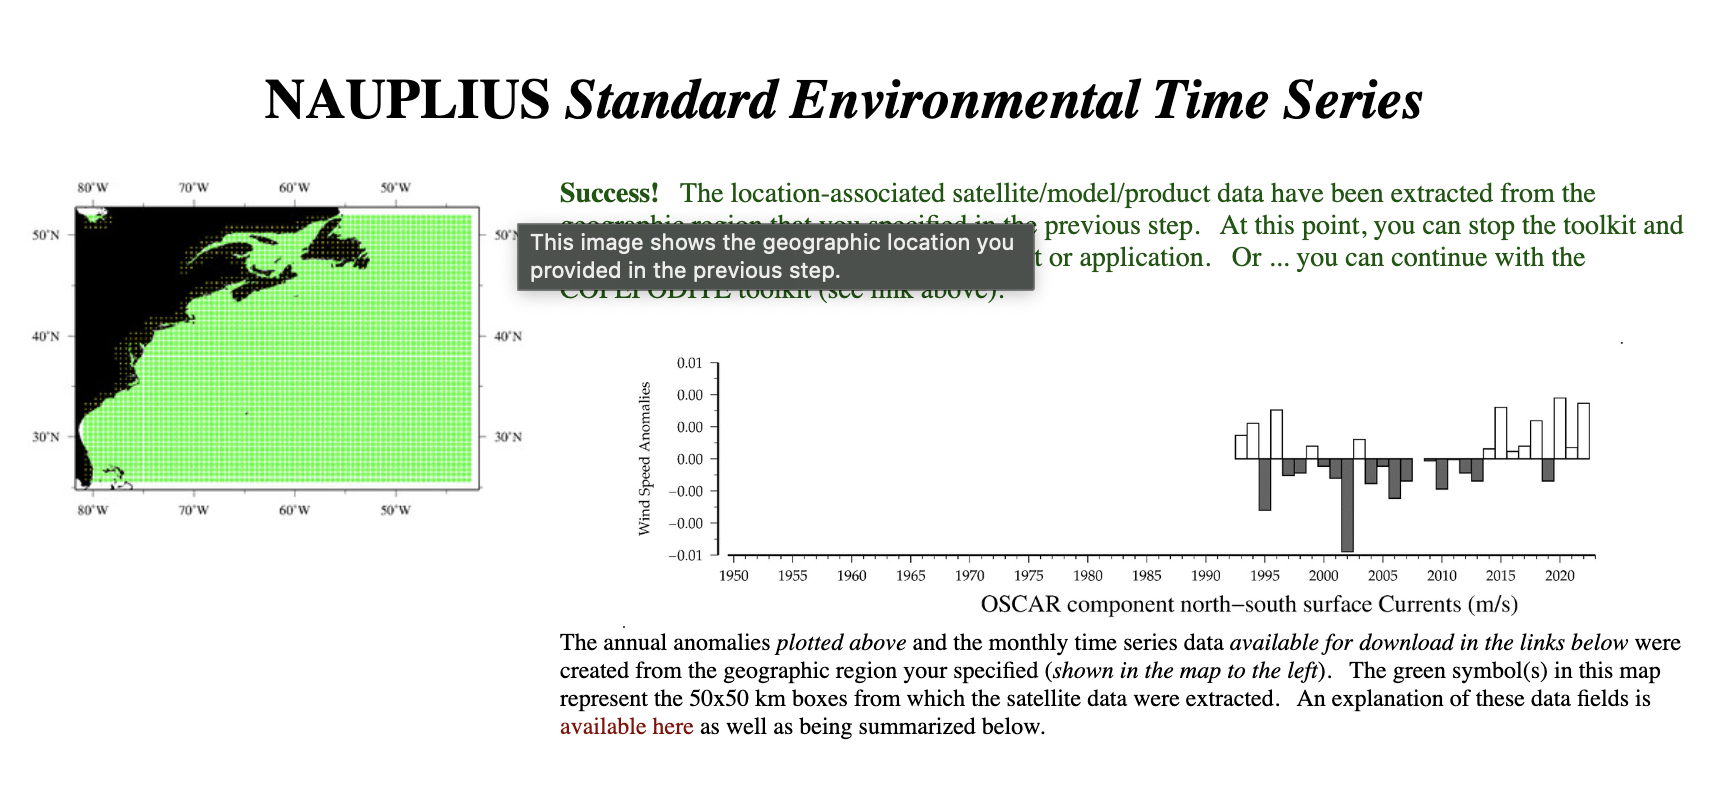

Using the data filtering options on the NAUPILUS/COPEPOD website, data for surface chlorophyll, salinity, sea surface temperature, mixed layer depth, and surface currents were taken for the time series of the RWSAS dataset. 

Each of these factors significantly affect the growth and presence of copepods and will affect the presence of right whales in turn. 



## Presence/Absence Data and Pseudo Absence Data

The RWSAS observation data records positive instances of observation, meaning it does not contain recordings of when a species is absent from an area. This means that in order to model and predict presence, pseudo-absence data must be created for the model to have true-false values to work with. Pseudo-absence data is defined as, "background data, where the species' environment is available, but the species was not recorded as present" (Pseudo-absences, n.d.). It is important to emphasize 'pseudo', as these are not true absences. 

For this project, using the available RWSAS presence data, I decided to create my pseudo absences using the locations the right whales had previously been found. This means that if there was an entry for a latitude and longitude during the month of January, 2018, then all other locations where there was not a recorded presence for the month of January 2018, were pseudo absences. To accomplish this, I added columns for each individual month. Then I added zeros to all latitudes and longitudes that were not recorded for that particular month. 

Then, to combine all of this into one dataset, I separated each month into its own dataset where the presence for that month was recorded as a 1, and all other rows were 0s in the presence column. I then concatenated these datasets into one large dataset with 143604 rows each marked with a presence or absence with the associated data. The original dataset was 11967 rows, so 11967*12 = 143604. 

In [7]:
presence_absence = pd.read_csv('/Users/annaboone/Desktop/Physics 491/presence_absence.csv')

In [8]:
presence_absence

,Id,SIGHTINGDATE,LAT,LON,year,month,day_x,TEMP= Reynolds OI-SST-v2 Temperature (C),OTHR= CMEMS Mixed Layer Depth (m),OTHR= OSCAR surface currents u-EW-component (m/s),OTHR= OSCAR surface currents v-NS-component (m/s),PSAL= Hadley-EN4 Salinity () at 5 m,CHLA= NASA-combo satellite Chlorophyll (mg/m3),presence
0,29961,2018-01-27,41.90,-70.40,2018,1,27,15.837,76.273,0.033,0.004,35.47,0.597,1
1,29941,2018-01-26,36.56,-74.89,2018,1,26,15.837,76.273,0.033,0.004,35.47,0.597,1
2,29923,2018-01-23,36.55,-74.35,2018,1,23,15.837,76.273,0.033,0.004,35.47,0.597,1
3,29902,2018-01-24,41.81,-69.89,2018,1,24,15.837,76.273,0.033,0.004,35.47,0.597,1
4,29893,2018-01-22,26.05,-81.81,2018,1,22,15.837,76.273,0.033,0.004,35.47,0.597,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143599,8304,2002-02-07,41.88,-70.28,2002,2,7,14.693,78.685,0.029,0.003,35.37,0.401,0
143600,8303,2002-02-07,42.24,-70.20,2002,2,7,14.693,78.685,0.029,0.003,35.37,0.401,0
143601,8302,2002-02-07,42.20,-70.20,2002,2,7,14.693,78.685,0.029,0.003,35.37,0.401,0
143602,8301,2002-02-07,42.15,-70.33,2002,2,7,14.693,78.685,0.029,0.003,35.37,0.401,0


The final dataset is very unbalanced (there are far more absences than presences) and so to make a dataset that is balanced for the decision tree to learn on, I took all of the presences, and then randomly sampled the same number of absences and then combined them into a final dataset. This dataset has 23934 instances of 50/50 presence vs absence. 

## Design

Most research on SDMs for presence prediction suggest using a decision tree. This is because we can inspect the variables the tree is splitting on, learning information about the most important factors in determining the probability of species presence. 

Using the sklearn decision tree library, I built a random forest classifier to predict the presence or absence of right whales in a given latitude and longitude based on the variable measurements. By changing the depth of the tree, number of leaf nodes, and modifying the input variables, I was able to inpect some of the most important variables when it comes to right whale presence in an area, and produce predictions about where right whales are most likely to be present given specific variables. 

## Analysis

Below is a mapping of the observed RWSAS data, with interactive slider bars for year and month. 

In [4]:
geo_all = pd.read_csv('/Users/annaboone/Desktop/Physics 491/geo_all.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
def change_month_year(year, month):
    new_map = geo_all.where(geo_all['year'] == year)
    
    
    new_map = new_map.where(geo_all['month'] == month)
    
    ax = world.clip([-88, 26, -40, 52]).plot(color="honeydew", edgecolor="black")
    plt.title('Right Whale Sightings')
    new_map.plot(ax=ax, marker='o', color='red', kind='scatter', y='LAT', x="LON", figsize=(5,5), label='RW Sighting')
    plt.legend(loc='lower right');
    

In [6]:
interact(change_month_year, year=(2002,2018,1), month=(1,12,1));

interactive(children=(IntSlider(value=2010, description='year', max=2018, min=2002), IntSlider(value=6, descri…

Each red dot represents a recorded observation of the presence of right whales during the time period specified. This visualization is not representative of the group size of right whales observed, but just represents the observed presence of the species in that area. 

Using a decision tree, as recommended by most species distribution model research I found, I was able to train the tree on the variables outlined above and the final balanced dataset. The tree would split on certain ranges of factors that were the most significant when it came to predicting presences/absences. Below is a picture of some of the splits the decision tree was making.

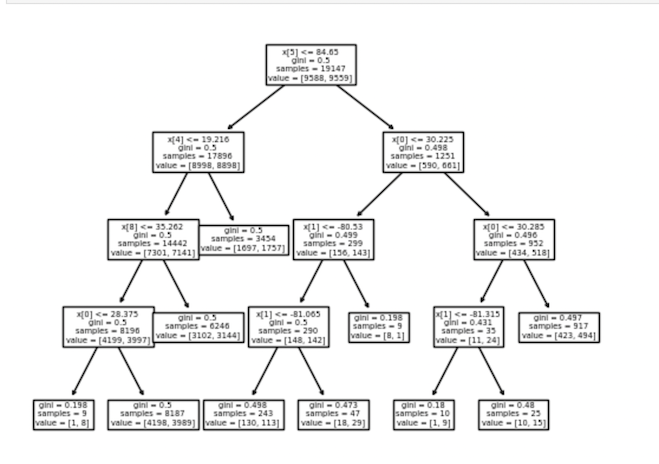

Using the predictions from the decision tree, I was then able to visualize the predicted presences vs absences and assess the accuracy using different accuracy metrics as outlined by my SDM research (Tessarolo et al., 2021).

These metrics were:
1. Sensitivity (proportion of predicted presences to observed presences)
2. Specificity (proportion of predicted absences to generated absences)

Based on these metrics, the decision tree model performed poorly when predicting presence (30%-60% accuracy), but according to SDM research, presence or absence as a true/false prediction is difficult using decision trees and should be used to predict probabilities of presence instead. Decision trees can also reveal more about the important environmental factors that influence a species' presence, whereas using a more accurate model such as a Neural Network, will not allow users to identify important variables after predictions are made. 

By inspecting the above tree (which is a snapshot of a portion of the whole tree) we can see that the tree split first on x[5], which was mixed layer depth. Then, the tree continued to split, most often on x[0] or x[1], which were latitude and longitude. This indicated to me that mixed layer depth was an important factor when determining presence. Mixed layer depth is the portion of the ocean that is directly affected by the atmosphere, and since right whales are not deep diving ceteceans, mixed layer depth may be a strong environmental factor in the probability of their presence in an area. 


Instead of using the predictions from the decision tree to produce a binary output (1 for present, 0 for absent) I decided to output the probability that each prediction belonged to the 'present' class, and visualize these predictions as a heatmap of the area. This interpretation of the decision tree's predictions makes a lot more sense in the context of presence and absence, and could be used to determine the likelihood of finding right whales in a specific area. 

In [16]:
predict_probs = pd.read_csv('./predict_probs.csv')

In [22]:
def prob_map(year, month):
    df= predict_probs
    df['pred'] = df['pred']*100
    
    gdf = gpd.GeoDataFrame(
    df, geometry = gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
    new_map = gdf.where(df['year'] == year)
    
    
    new_map = new_map.where(gdf['month'] == month)
    new_map = new_map.dropna()
    ax = world.clip([-88, 26, -40, 52]).plot(color="honeydew", edgecolor="black")
    sns.kdeplot(data=new_map, x="lon", y="lat",
    fill=True ,ax=ax, cbar=True, label='Percentage Probability'
    )
    plt.title('Probability of Right Whale Presence')
    plt.legend(loc='lower right');

In [23]:
interact(prob_map, year=(2002,2018,1), month=(1,12,1));

interactive(children=(IntSlider(value=2010, description='year', max=2018, min=2002), IntSlider(value=6, descri…

# Significance and Conclusion

The variables my decision tree revealed to be the most impactful when predicting right whale presence were the latitude, longitude, and mixed layer depth. Salinity also showed up as an important variable, along with sea surface temperature. These findings make sense to me because I would expect things like salinity and sea surface temperature to force the right whale to move locations based on temperature necessities (for breeding) or salinity requirements for food sources. The decision tree finding that mixed layer depth was also interesting, because this is the specific layer of the ocean that is the most directly impacted by the atmosphere. This also makes sense to me because in my research about right whales, I found out that they are not deep diving ceteceans and so it is plausible that they spend most of their time in the layers directly affected by the atmosphere, rather than a sperm whale which can dive to great depths being largely unaffected by currents, wind, and temperatures on the surface. 

The significance of this finding is that it could imply that changing atmospheric conditions would have a great impact on right whales and potentially change migration or presence patters. This indicates to me that right whales may be a particularly sensitive cetecean to atmospheric as well as oceanic climate changes in the future.  

# Further Research

During the course of this project, I briefly experimented with a background probability model that would determine the likelihood that a point belonged to each class, that is: present or absent. For example, my model was determining the likelihood that a whale would be present given the specific variables, based on a probability distribution that described the foreground (presence) and the background (absence). If I were to continue this project, this is a classification and prediction method I would like to explore further, and something that I think could work well with this type of data. This would be an interesting exploration of the distribution that describes right whale presence or absence, and could possibly give more insight into the environmental factors that have the most effect on right whales. 

I think that it would be really interesting to incorporate climate change prediction models into this type of modelling, and if I were to continue to do this project, this is something I would hope to accomplish. By taking future climate predictions for sea surface temperature, mixed layer depth, and salinity I could see how my model predicts right whale presence will change. There are future prediction models on NOAA for this type of climate change exploration and so I would be able to compare my predictions against what NOAA predicts. 

# Citations

1. Fisheries, N. (2022, February 3). North Atlantic Right Whale. NOAA. https://www.fisheries.noaa.gov/species/north-atlantic-right-whale#:~:text=Population%20Status,years%20has%20been%20below%20average
2. Pseudo-absences. (n.d.). https://cran.r-project.org/web/packages/biomod2/vignettes/vignette_pseudoAbsences.html
3.Tessarolo, G., Lobo, J. M., Rangel, T. F., & Hortal, J. (2021). High uncertainty in the effects of data characteristics on the performance of species distribution models. Ecological Indicators, 121, 107147. https://doi.org/10.1016/j.ecolind.2020.107147
